## Implementation of a federated learning model using FedAvg on the MNIST Data set

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data
import random
import matplotlib.pyplot as plt

# Define the parameters

In [5]:
clients = 15 # the number of clients
learningRounds = 18 # the number of communications between the clients and the global model
numEpochs = 5 # the number of local epochs
lr = 0.1 # training rate
localBatchSize = 10 # batch size

# Download and preprocess the MNIST data set

In [6]:
# download the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainData = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testData = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testLoader = torch.utils.data.DataLoader(testData, batch_size=10, shuffle=False)
# perform a shuffle to assure iid
indices = list(range(len(trainData)))
random.shuffle(indices)
dataShuffled = [trainData[i] for i in indices]
# calculating the size of the samples to assure every client gets the same size
subsetSize = len(trainData) // clients
# create a subset for each client
clientData = [dataShuffled[i * subsetSize:(i + 1) * subsetSize] for i in range(clients)]
# print the sample size and labels of each client
#for i in range(clients):
#     client_samples = clientData[i]
#     print(f"Client {i+1} sample size: {len(client_samples)}")
#     labels = [sample[1] for sample in client_samples]
#     print(f"Client {i+1} labels: {labels}")

Client 1 sample size: 2000
Client 1 labels: [2, 4, 3, 2, 2, 9, 0, 7, 7, 0, 1, 6, 8, 8, 1, 2, 8, 0, 8, 6, 0, 7, 7, 9, 5, 4, 6, 3, 4, 3, 7, 5, 7, 2, 5, 1, 9, 5, 4, 7, 6, 1, 8, 4, 6, 7, 3, 6, 3, 1, 7, 1, 2, 8, 1, 1, 0, 9, 8, 0, 0, 3, 8, 9, 4, 0, 3, 8, 7, 2, 5, 9, 2, 2, 0, 1, 7, 4, 6, 5, 7, 0, 7, 3, 0, 6, 0, 7, 8, 1, 3, 2, 5, 9, 2, 7, 7, 2, 8, 4, 3, 6, 2, 5, 7, 2, 7, 7, 9, 8, 3, 7, 2, 7, 9, 4, 1, 3, 0, 4, 6, 0, 5, 8, 4, 4, 0, 9, 1, 6, 7, 7, 2, 1, 8, 2, 1, 5, 3, 5, 4, 1, 1, 4, 5, 1, 4, 2, 2, 1, 6, 0, 6, 9, 2, 8, 1, 5, 8, 0, 7, 8, 9, 7, 4, 8, 6, 9, 6, 8, 8, 5, 7, 9, 0, 7, 2, 1, 3, 0, 8, 7, 5, 4, 6, 7, 5, 3, 5, 4, 8, 0, 5, 3, 6, 6, 8, 0, 1, 3, 4, 4, 9, 1, 9, 3, 5, 5, 5, 7, 4, 2, 3, 7, 0, 3, 1, 9, 3, 1, 3, 0, 4, 0, 9, 9, 4, 7, 8, 2, 5, 0, 1, 4, 7, 3, 0, 4, 3, 3, 3, 4, 1, 8, 4, 3, 9, 3, 2, 8, 5, 8, 1, 4, 0, 1, 7, 9, 4, 9, 8, 0, 8, 4, 7, 0, 3, 9, 3, 6, 5, 0, 7, 7, 3, 3, 0, 5, 6, 2, 1, 7, 9, 6, 1, 7, 3, 0, 9, 3, 0, 6, 6, 1, 0, 2, 3, 1, 9, 8, 4, 6, 9, 4, 6, 1, 8, 4, 1, 2, 1, 4, 4, 6, 6, 4, 6, 4, 0

# Define the global model

In [15]:
globalModel = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(32, 64, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(64 * 12 * 12, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

# Run the federated training

Learning Round: 1
Client 1 finished training for: 1 epoch(s)
Client 1 finished training for: 2 epoch(s)
Client 1 finished training for: 3 epoch(s)
Client 1 finished training for: 4 epoch(s)
Client 1 finished training for: 5 epoch(s)
Client 2 finished training for: 1 epoch(s)
Client 2 finished training for: 2 epoch(s)
Client 2 finished training for: 3 epoch(s)
Client 2 finished training for: 4 epoch(s)
Client 2 finished training for: 5 epoch(s)
Client 3 finished training for: 1 epoch(s)
Client 3 finished training for: 2 epoch(s)
Client 3 finished training for: 3 epoch(s)
Client 3 finished training for: 4 epoch(s)
Client 3 finished training for: 5 epoch(s)
Client 4 finished training for: 1 epoch(s)
Client 4 finished training for: 2 epoch(s)
Client 4 finished training for: 3 epoch(s)
Client 4 finished training for: 4 epoch(s)
Client 4 finished training for: 5 epoch(s)
Client 5 finished training for: 1 epoch(s)
Client 5 finished training for: 2 epoch(s)
Client 5 finished training for: 3 ep

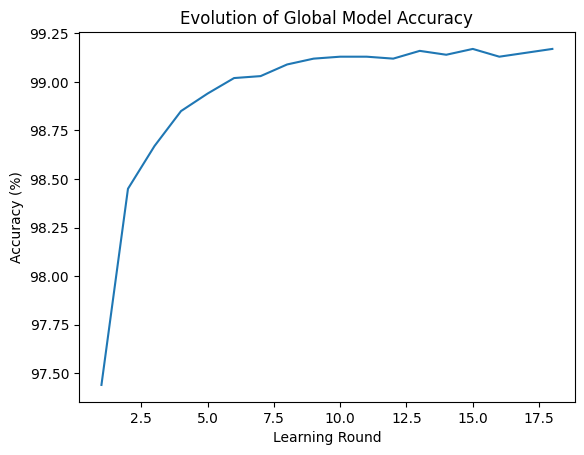

Training is finished after 18 federated rounds on 15 clients!


In [16]:
accuracies = []
# iterate over all rounds
for rnd in range(learningRounds):
    # print round number
    print(f"Learning Round: {rnd + 1}")
    # to save local models parameters
    params = []
    # iterate over all clients
    for client in range(clients):
        # create a local model identical to the global model
        clientModel = nn.Sequential(
                        nn.Conv2d(1, 32, kernel_size=3),
                        nn.ReLU(),
                        nn.Conv2d(32, 64, kernel_size=3),
                        nn.ReLU(),
                        nn.MaxPool2d(2),
                        nn.Flatten(),
                        nn.Linear(64 * 12 * 12, 128),
                        nn.ReLU(),
                        nn.Linear(128, 10)
                        )
        # client receives a copy of the global model current parameters
        clientModel.load_state_dict(globalModel.state_dict())
        # load the data to the model
        trainLoader = data.DataLoader(clientData[client], batch_size=localBatchSize, shuffle=False)
        # client optimizer and loss function
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(clientModel.parameters(), lr=lr)
        # train model on client k for the defined local epochs
        for epoch in range(numEpochs):
            # perform forward pass and back propagation updating the local model
            for inputs, labels in trainLoader:
                optimizer.zero_grad()
                outputs = clientModel(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
            # print client's k training progress
            print(f"Client {client+1} finished training for: {epoch+1} epoch(s)")
        # aggregate local model parameters
        local_params = [param.data for param in clientModel.parameters()]
        params.append(local_params)
    # when a training round is finished, aggregate and average the parameters from all local models
    averagedParameters = [
        torch.mean(torch.stack(params), dim=0) for params in zip(*params)
    ]
    for global_param, avg_param in zip(globalModel.parameters(), averagedParameters):
        global_param.data = avg_param
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testLoader:
            outputs = globalModel(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    accuracies.append(accuracy)
print(f"Training is finished after {learningRounds} federated rounds on {clients} clients!")
# Plot the evolution of global model accuracy
plt.plot(range(1, learningRounds + 1), accuracies)
plt.xlabel("Learning Round")
plt.ylabel("Accuracy (%)")
plt.title("Evolution of Global Model Accuracy")
plt.show()
print(f"Training is finished after {learningRounds} federated rounds on {clients} clients!")

# we can now evaluate the global model on testing data

In [8]:
    device = torch.device("cpu")
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testLoader:
            images, labels = images.to(device), labels.to(device)
            outputs = globalModel(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy}%")

Test Accuracy: 99.13%
